In [71]:
class Student():

    def __init__(self,name,gender,data_sheet,image_url):
        self.name = name
        self.gender = gender
        self.data_sheet = data_sheet
        self.image_url = image_url

    def get_avg_grades(self):
        grade_list = self.data_sheet.get_grades_as_list()
        if not grade_list:
            return 0
        else:
            return sum(grade_list)/len(grade_list)

    def show_progression(self):
        progress = 0
        for course in self.data_sheet.courses:
            if course.grade:
                progress += course.ECTS
        
        return (progress/150)*100

class DataSheet():
    def __init__(self,courses):
        self.courses = courses


    def get_grades_as_list(self):
        grade_list = [course.grade for course in self.courses if course.grade is not None]
        return grade_list


class Course():
    def __init__(self,name,classroom,teacher,ECTS,grade=None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ECTS = ECTS
        self.grade = grade

     

In [72]:


student_a_course_python = Course("Python","2.03","Thomas",10,10)
student_a_course_typescript = Course("TypeScript","2.03","Jörg",10,7)
student_a_course_security = Course("Security","2.03","Daniel",10)

student_a_data_sheet = DataSheet([student_a_course_python, student_a_course_typescript,student_a_course_security])

student_a = Student("Aaa","male",student_a_data_sheet,"#")

list_of_grades = student_a_data_sheet.get_grades_as_list()
print(list_of_grades)
avg_grade_a = student_a.get_avg_grades()
print(avg_grade_a)





[10, 7]
8.5


In [73]:
import random
import csv

COURSES = ["Python","TypeScript","Security","GameDev"]
TEACHERS = ["Thomas","Jon","Nikolaj","Jörg","Daniel"]
GRADES = [None,2,4,7,10,12]

def generate_students(n,filename):
    
    with open ("student.csv", "w") as student_csv:
        writer = csv.writer(student_csv)
        writer.writerow(['stud_name', 'Gender', 'course_name', 'Teacher', 'ECTS', 'Class_room', 'Grade', 'image_url'])
        
        for i in range(n):
            name= f'Student {i+1}'
            gender = random.choice(["Male","Female"])
            courses = [Course(name=random.choice(COURSES),
                         classroom=f'c{i+1}',
                         teacher=random.choice(TEACHERS),
                         ECTS=10,
                         grade=random.choice(GRADES))
                  for _ in range(random.randrange(1,5))]
            image_url = "http//:www." + name + ".cphbusiness.dk"
            for course in courses:
                writer.writerow([name, gender, course.name, course.teacher, str(course.ECTS), course.classroom, str(course.grade or ''), image_url])
                

           


generate_students(5,"./student.csv") 
    



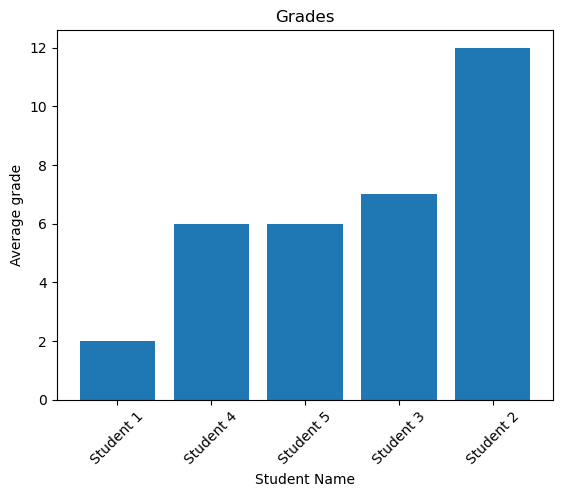

In [74]:
import matplotlib.pyplot as plt

def read_students_from_csv_file(filename):
    students = {}
    with open (filename, "r") as file:
        reader =  csv.DictReader(file)
        for line in reader:
            name = line['stud_name']
            gender = line['Gender']
            course_name = line['course_name']
            teacher = line['Teacher']
            ects = int(line['ECTS'])
            class_room = line['Class_room']
            grade = int(line['Grade']) if line['Grade'] else None
            image_url = line['image_url']
            if name in students:
                student = students[name]
            else:
                student = Student(name,gender,DataSheet([]),image_url)
                students[name] = student
            course = Course(course_name,class_room,teacher,ects,grade)
            student.data_sheet.courses.append(course)

    return list(students.values())        
        
           
students = read_students_from_csv_file("./student.csv")

sorted_students = sorted(students, key=lambda student: student.get_avg_grades())

names = [student.name for student in sorted_students]
grades = [student.get_avg_grades() for student in sorted_students]

plt.bar(names, grades)
plt.xlabel('Student Name')
plt.ylabel('Average grade')
plt.title('Grades')
plt.xticks(rotation = 45)

plt.show()





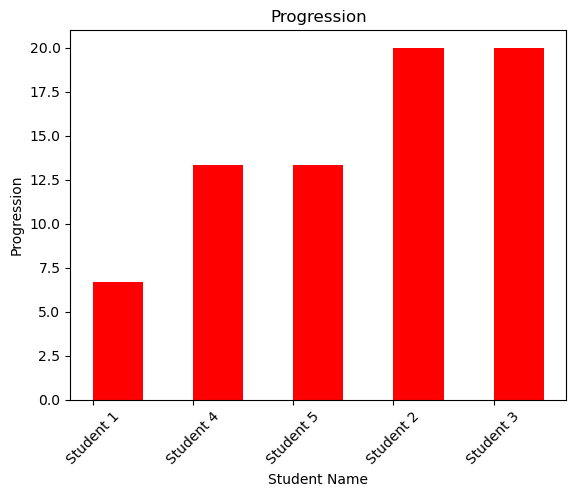

In [85]:


sorted_students = sorted(students, key=lambda student: student.show_progression())
progression = [student.show_progression() for student in sorted_students]

names = [student.name for student in sorted_students]

bar_width = 0.5
bar_gap = 0.4

plt.bar(names, progression, width=bar_width, align='edge', color='red')
plt.xlabel('Student Name')
plt.ylabel('Progression')
plt.title('Progression')
plt.xticks(rotation = 45)

plt.show()